In [1]:
# 필요 라이브러리

# 분석을 위한 라이브러리
import numpy as np
import pandas as pd

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import os

# 에러메세지 안나오게
import warnings
warnings.filterwarnings('ignore')

# pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [6]:
# 모든 파일을 한번에 불러오기 위한 코드

dir_path2 = 'Marketing Funnel by Olist'
files2 = [os.path.join(dir_path2, file) for file in os.listdir(dir_path2)]

# 파일을 저장할 변수들의 딕셔너리 생성
data2 = {}

for file in files2:
    # 파일 이름에서 확장자를 제거하여 변수 이름으로 사용
    var_name2 = os.path.splitext(os.path.basename(file))[0]
    
    # pandas를 사용하여 파일을 불러와서 변수에 저장
    data2[var_name2] = pd.read_csv(file)

print(data2.keys())

dict_keys(['olist_closed_deals_dataset', 'olist_marketing_qualified_leads_dataset'])


In [53]:
# 모든 파일을 한번에 불러오기 위한 코드

dir_path = 'Brazilian E-Commerce Public Dataset by Olist'
files = [os.path.join(dir_path, file) for file in os.listdir(dir_path)]

# 파일을 저장할 변수들의 딕셔너리 생성
data = {}

for file in files:
    # 파일 이름에서 확장자를 제거하여 변수 이름으로 사용
    var_name = os.path.splitext(os.path.basename(file))[0]
    
    # pandas를 사용하여 파일을 불러와서 변수에 저장
    data[var_name] = pd.read_csv(file)

print(data.keys())

dict_keys(['olist_customers_dataset', 'olist_geolocation_dataset', 'olist_orders_dataset', 'olist_order_items_dataset', 'olist_order_payments_dataset', 'olist_order_reviews_dataset', 'olist_products_dataset', 'olist_sellers_dataset', 'product_category_name_translation'])


### 고객

In [9]:
df = data['olist_customers_dataset']
round(df['customer_unique_id'].nunique()/df['customer_id'].nunique(),2)

0.97

In [10]:
print('주문횟수',df['customer_id'].nunique())
print('유니크고객수',df['customer_unique_id'].nunique())

주문횟수 99441
유니크고객수 96096


In [11]:
df['customer_city'].value_counts()

customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64

Text(0, 0.5, '거주 주이름')

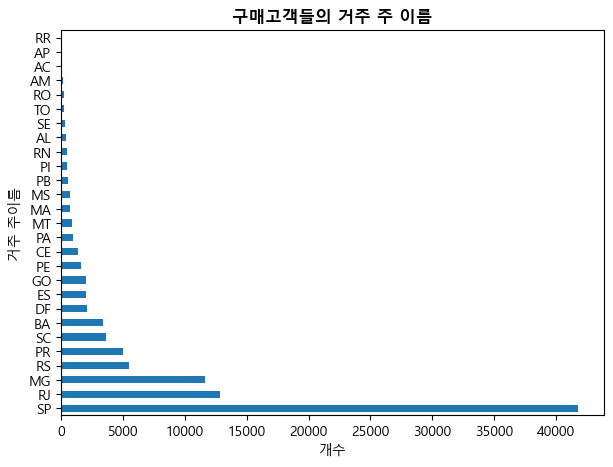

In [21]:
plt.subplots(figsize=(7,5))
df['customer_state'].value_counts().plot(kind='barh')
plt.title('구매고객들의 거주 주 이름',fontweight='bold')
plt.xlabel('개수')
plt.ylabel('거주 주이름')

In [71]:
df=data['olist_orders_dataset']
df['order_purchase'] = pd.to_datetime(df['order_purchase_timestamp']).dt.strftime('%Y-%m')
df['예상과실제배송차이'] = (pd.to_datetime(df['order_estimated_delivery_date'])-pd.to_datetime(df['order_delivered_customer_date']))
df['주문승인까지걸린시간'] = pd.to_datetime(df['order_approved_at'])-pd.to_datetime(df['order_purchase_timestamp'])
df['제품인수에서배송까지걸린시간'] = pd.to_datetime(df['order_delivered_customer_date'])-pd.to_datetime(df['order_approved_at'])
df['주문후배송까지걸린시간'] = pd.to_datetime(df['order_delivered_customer_date'])-pd.to_datetime(df['order_purchase_timestamp'])
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,예상과실제배송차이,주문승인까지걸린시간,제품인수에서배송까지걸린시간,주문후배송까지걸린시간,order_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7 days 02:34:47,0 days 00:10:42,8 days 10:17:58,8 days 10:28:40,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,5 days 08:32:15,1 days 06:42:50,12 days 12:03:18,13 days 18:46:08,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,17 days 05:53:31,0 days 00:16:34,9 days 09:11:06,9 days 09:27:40,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,12 days 23:31:18,0 days 00:17:53,13 days 04:42:43,13 days 05:00:36,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,9 days 05:42:58,0 days 01:01:50,2 days 19:56:33,2 days 20:58:23,2018-02


In [55]:
df['customer_id'].nunique()

99441

In [56]:
df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Text(0, 0.5, '주문횟수')

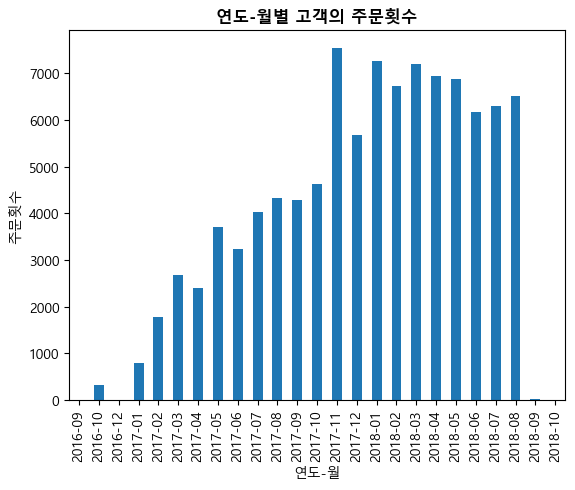

In [44]:
df.groupby('order_purchase').size().plot(kind='bar')
plt.title('연도-월별 고객의 주문횟수',fontweight='bold')
plt.xlabel('연도-월')
plt.ylabel('주문횟수')

In [64]:
625-141-478-6


0

In [60]:
print(df[df.order_status=='canceled'].shape)
df[df.order_status=='canceled'].isnull().sum()

(625, 12)


order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
order_estimated_delivery_date      0
예상과실제배송차이                        619
주문승인까지걸린시간                       141
제품인수에서배송까지걸린시간                   619
주문후배송까지걸린시간                      619
dtype: int64

Text(0, 0.5, '주문횟수')

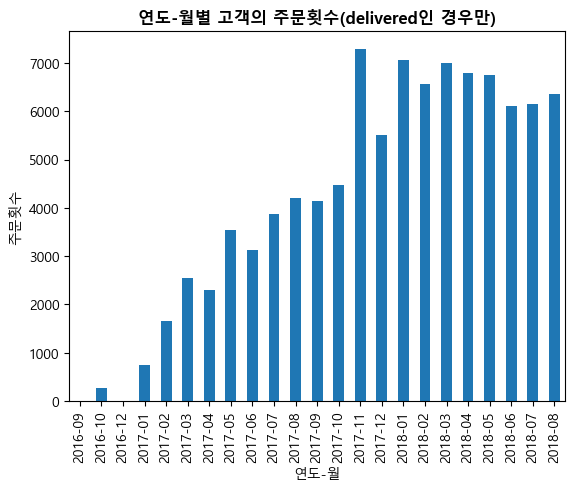

In [73]:
df[df.order_status=='delivered'].groupby('order_purchase').size().plot(kind='bar')
plt.title('연도-월별 고객의 주문횟수(delivered인 경우만)',fontweight='bold')
plt.xlabel('연도-월')
plt.ylabel('주문횟수')

Text(0, 0.5, '주문횟수')

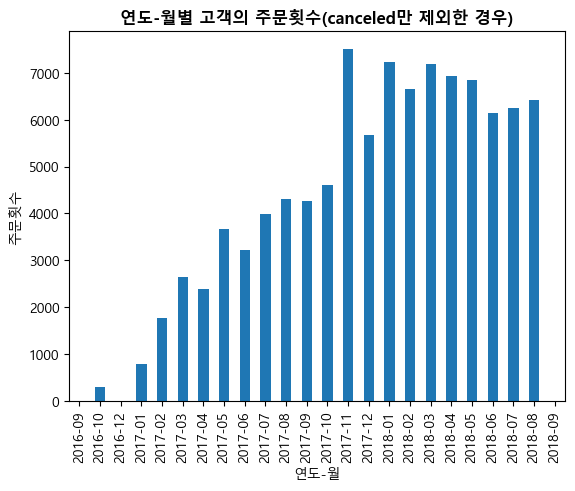

In [75]:
df[df.order_status!='canceled'].groupby('order_purchase').size().plot(kind='bar')
plt.title('연도-월별 고객의 주문횟수(canceled만 제외한 경우)',fontweight='bold')
plt.xlabel('연도-월')
plt.ylabel('주문횟수')

In [79]:
df[df.order_status!='canceled'][['예상과실제배송차이','주문승인까지걸린시간','제품인수에서배송까지걸린시간','주문후배송까지걸린시간']].describe()

,예상과실제배송차이,주문승인까지걸린시간,제품인수에서배송까지걸린시간,주문후배송까지걸린시간
count,96470,98797,96456,96470
mean,11 days 04:16:30.062972944,0 days 10:23:53.854246586,12 days 03:07:01.037229410,12 days 13:23:49.957271690
std,10 days 04:25:28.179310468,1 days 01:46:28.131372175,9 days 12:23:44.809559415,9 days 13:06:27.911052929
min,-189 days +00:35:53,0 days 00:00:00,-7 days +00:14:54,0 days 12:48:07
25%,6 days 09:21:20,0 days 00:12:55,6 days 07:25:42.500000,6 days 18:23:20
50%,11 days 22:45:16,0 days 00:20:37,9 days 20:27:11.500000,10 days 05:13:10
75%,16 days 05:51:27.250000,0 days 14:35:13,15 days 03:23:11.750000,15 days 17:17:03.750000
max,146 days 00:23:13,187 days 21:10:50,208 days 12:01:24,209 days 15:05:12


### 리뷰데이터

In [94]:
df=data['olist_order_reviews_dataset']
df['리뷰답변까지걸리는시간'] = pd.to_datetime(df['review_answer_timestamp']) - pd.to_datetime(df['review_creation_date'])
df.shape
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,리뷰답변까지걸리는시간
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,0 days 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1 days 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1 days 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,0 days 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1 days 10:26:53


In [116]:
pip install WordCloud


     -------------------------------------- 153.1/153.1 kB 4.5 MB/s eta 0:00:00


In [119]:
import re
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

review = df[~df['review_comment_message'].isnull()]['review_comment_message'].apply(lambda x: x.lower().split(' '))
total = []
for i in review:
    for j in i:
        total.append(j)

for i in total:
    re.sub(r'[^\w\s]', '', i)

total = set(total)
word_tokens = set(stopwords.words('english'))

result = []
for w in total: 
    if w not in word_tokens: 
        result.append(w)

result

[nltk_data] Downloading package stopwords to C:\Users\KIMJEONGSU.DESKT
[nltk_data]     OP-3GN3AD1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['',
 'bonito.\r\n',
 'diameu',
 'maurício',
 'tomem',
 'cortina',
 '3/4,',
 'cocneta',
 'claro',
 '4.',
 'controles.',
 'pulseiras.',
 'vendendor',
 'defeito.\r\nestou',
 'sr´s.\r\nno',
 'atingido',
 'obrigada.',
 'quebrei',
 'lá,',
 'atrito.',
 'poltugês',
 'interessarem',
 'queram',
 'recebido\r\nbuxinho',
 'dia.\r\nefetuei',
 'abaixada',
 'estaav',
 'rodinha',
 '.nao',
 'encaixei',
 'sereia',
 'tortas,',
 'acredito',
 'maravilhosa.valeu',
 'pac.',
 'confiável.mesmo',
 'pago.\r\n',
 'tinham',
 'muito.',
 'cumprir',
 'especificação,dentro',
 'encontrei.',
 'fisesse',
 'sujar.',
 'suges',
 'manta..\r\nporem',
 'informativo',
 'configurar,',
 'telefone,na',
 'nf',
 'foto!',
 'atenção,obrigada.',
 'vagabunda.',
 'fude',
 'w.\r\nnão',
 'cancelei',
 'sr.',
 'prateleira',
 'péssimo.',
 'mostrando',
 'estoque"',
 'étic',
 'também.\r\n\r\natt',
 'cigarros',
 'trenzinho',
 'carrinho,',
 'surpreendem,',
 'pontos,',
 'notbook',
 'boa,',
 '?felpudas?',
 'resolver.',
 'escolha!',
 'fisicamente',


In [98]:
df['리뷰답변까지걸리는시간'].describe()

count                        99224
mean     3 days 03:34:33.029700475
std      9 days 21:21:40.258026234
min                0 days 02:08:29
25%         1 days 00:07:00.750000
50%         1 days 16:11:55.500000
75%                3 days 02:29:08
max              518 days 16:46:52
Name: 리뷰답변까지걸리는시간, dtype: object

In [84]:
df['review_id'].nunique()

98410

Text(0, 0.5, '유입 경로')

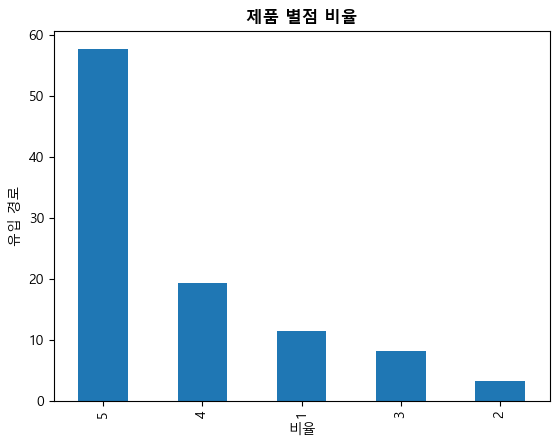

In [91]:
(df['review_score'].value_counts(normalize=True)*100).plot(kind='bar')
plt.title('제품 별점 비율',fontweight='bold')
plt.xlabel('비율')
plt.ylabel('유입 경로')

In [93]:
df.isnull().sum()/99224

review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.883415
review_comment_message     0.587025
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64

In [127]:
df['order_id'].value_counts().head(15)

order_id
c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
5cb890a68b91b6158d69257e4e2bc359    2
2143393cca994a4b8235bc1d67ded772    2
25320e12b3d6e8f54f17389037588bba    2
0176a6846bcb3b0d3aa3116a9a768597    2
d9e44c3fd2ce16086619f299e92e12d8    2
21cb4961399b846b168d0358100f473b    2
6b99ff92735c747557e84a5f5cd7a560    2
1a69d5fdff0003d4571dffa1a9a10967    2
28a32ec11abbac5c27adfa4d8cbc351a    2
a979479c1af57af858b45dfd2d67ee04    2
acd76a8508680cbb5d4c04707be03f87    2
Name: count, dtype: int64

In [131]:
df[df.order_id=='acd76a8508680cbb5d4c04707be03f87']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,리뷰답변까지걸리는시간
62945,31159f0bf7729af38085b0f665fde07b,acd76a8508680cbb5d4c04707be03f87,5,NaN,NaN,2017-03-26 00:00:00,2017-03-27 14:54:50,1 days 14:54:50
68073,bafa8d3d8d957f75f04b28ad21d811d9,acd76a8508680cbb5d4c04707be03f87,5,NaN,NaN,2017-03-28 00:00:00,2017-03-29 13:34:26,1 days 13:34:26


In [132]:
df2 = data['olist_order_items_dataset']
df2[df2['order_id']=='acd76a8508680cbb5d4c04707be03f87']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
75908,acd76a8508680cbb5d4c04707be03f87,1,af9418dfcdd7f19b51906a2f32cd6bc0,da8622b14eb17ae2831f4ac5b9dab84a,2017-03-29 15:48:42,129.0,16.01


In [134]:
df3 = data['olist_orders_dataset']
df3[df3['order_id']=='acd76a8508680cbb5d4c04707be03f87']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,예상과실제배송차이,주문승인까지걸린시간,제품인수에서배송까지걸린시간,주문후배송까지걸린시간,order_purchase
59094,acd76a8508680cbb5d4c04707be03f87,7a2ffc93e2f9aac4cd2c0e4564446777,delivered,2017-03-13 15:48:42,2017-03-13 15:48:42,2017-03-20 02:15:36,2017-03-27 12:54:35,2017-04-11 00:00:00,14 days 11:05:25,0 days,13 days 21:05:53,13 days 21:05:53,2017-03


In [138]:
df = data['olist_order_payments_dataset']
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [146]:
df['order_id'].value_counts().head(150)

order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
170dcd772ea4f51c3a859f9beef5d297     5
14d5f7d2a3755fbd4df406ef4c4b400c     5
213a17bb373d57763822d78e40e7ca38     5
368b20312c68710e9d75cbb5cef5c469     5
e47a63ad65b54953702eae37cb14632b     5
Name: count, Length: 150, dtype: int64

In [147]:
df[df['order_id']=='368b20312c68710e9d75cbb5cef5c469']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
26746,368b20312c68710e9d75cbb5cef5c469,3,voucher,1,47.86
44823,368b20312c68710e9d75cbb5cef5c469,2,voucher,1,22.47
86478,368b20312c68710e9d75cbb5cef5c469,5,voucher,1,47.75
92560,368b20312c68710e9d75cbb5cef5c469,1,voucher,1,18.85
96993,368b20312c68710e9d75cbb5cef5c469,4,voucher,1,35.17


In [148]:
df2=data['olist_order_items_dataset']
df2[df2.order_id=='368b20312c68710e9d75cbb5cef5c469']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
23946,368b20312c68710e9d75cbb5cef5c469,1,f2c1df0fc307ec60e3321c708c1dcac3,4a3ca9315b744ce9f8e9374361493884,2018-01-07 23:36:56,48.0,33.82
23947,368b20312c68710e9d75cbb5cef5c469,2,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-01-07 23:36:56,86.9,3.38


In [152]:
df3 = data['olist_orders_dataset']
df4 = df3.merge(df2, on='order_id', how='outer')
df4['total'] = df4['price']+df4['freight_value']
df4[df4.order_id=='368b20312c68710e9d75cbb5cef5c469']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,예상과실제배송차이,주문승인까지걸린시간,제품인수에서배송까지걸린시간,주문후배송까지걸린시간,order_purchase,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total
98349,368b20312c68710e9d75cbb5cef5c469,b85a55907f00013ed7b953a50de74e12,delivered,2018-01-01 22:40:31,2018-01-01 23:36:56,2018-01-03 12:33:09,2018-01-09 20:14:51,2018-02-02 00:00:00,23 days 03:45:09,0 days 00:56:25,7 days 20:37:55,7 days 21:34:20,2018-01,1.0,f2c1df0fc307ec60e3321c708c1dcac3,4a3ca9315b744ce9f8e9374361493884,2018-01-07 23:36:56,48.0,33.82,81.82
98350,368b20312c68710e9d75cbb5cef5c469,b85a55907f00013ed7b953a50de74e12,delivered,2018-01-01 22:40:31,2018-01-01 23:36:56,2018-01-03 12:33:09,2018-01-09 20:14:51,2018-02-02 00:00:00,23 days 03:45:09,0 days 00:56:25,7 days 20:37:55,7 days 21:34:20,2018-01,2.0,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-01-07 23:36:56,86.9,3.38,90.28


Text(0, 0.5, '매출금액')

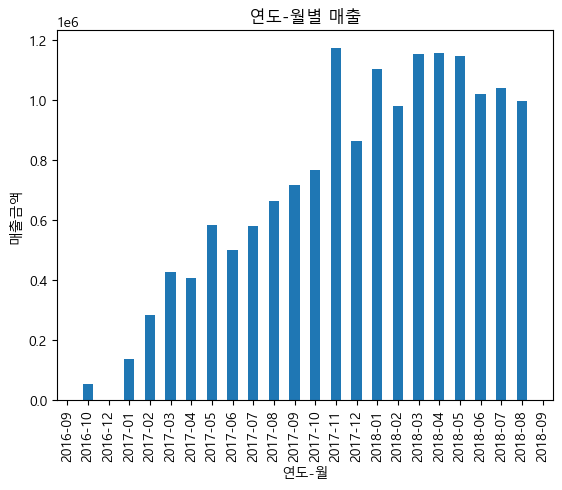

In [156]:
df4[df4.order_status!='canceled'].groupby(['order_purchase']).sum()['total'].plot(kind='bar')
plt.title('연도-월별 매출')
plt.xlabel('연도-월')
plt.ylabel('매출금액')

